# Learning

In [20]:
import torch
import numpy as np
import matplotlib.pyplot as plt

## Data Visualization

In [21]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

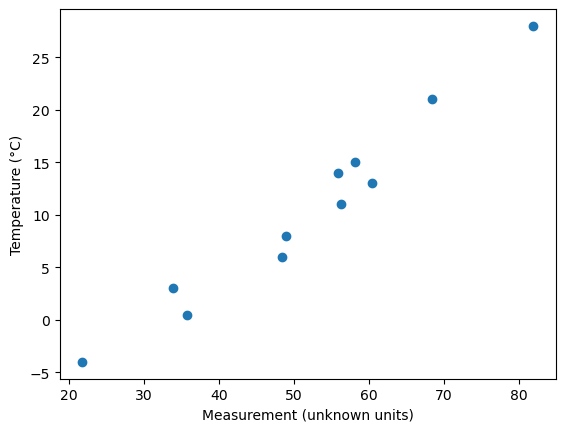

In [22]:
plt.scatter(t_u, t_c)
plt.xlabel("Measurement (unknown units)")
plt.ylabel("Temperature (°C)")
plt.show()

## Loss Function

In [23]:
def model(t_u, w, b):
    return w * t_u + b

In [24]:
def loss_fn(t_p, t_c):
    squared_diff = (t_p - t_c)**2
    return squared_diff.mean()

In [25]:
w = torch.ones(())
b = torch.zeros(())

t_p = model(t_u, w, b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [26]:
loss = loss_fn(t_p, t_c)
loss

tensor(1763.8848)

## Gradient Descent

In [27]:
delta = 0.1

loss_rate_of_change_w = \
    (loss_fn(model(t_u, w + delta, b), t_c) -
    loss_fn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)

loss_rate_of_change_w

tensor(4517.2974)

In [28]:
learning_rate = 1e-2

w = w - learning_rate * loss_rate_of_change_w

In [29]:
loss_rate_of_change_b = \
    (loss_fn(model(t_u, w, b + delta), t_c) -
    loss_fn(model(t_u, w, b - delta), t_c)) / (2.0 * delta)

In [30]:
b = b - learning_rate * loss_rate_of_change_b

In [31]:
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)
    return dsq_diffs

In [32]:
def dmodel_dw(t_u, w, b):
    return t_u

In [33]:
def dmodel_db(t_u, w, b):
    return 1.0

$$
\nabla_{w, b} L = \left( \dfrac{\delta L}{\delta w}, \dfrac{\delta L}{\delta b} \right) =
\left( \dfrac{\delta L}{\delta m} \cdot \dfrac{\delta L}{\delta w}, \dfrac{\delta L}{\delta m} \cdot \dfrac{\delta L}{\delta b} \right)
$$

In [34]:
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

In [35]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c, print_params=True):
    for epoch in range(1, n_epochs + 1):
        w, b = params

        t_p = model(t_u, w, b)
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)

        params = params - learning_rate * grad

        if epoch in {1, 2, 3, 10, 11, 99, 100, 4000, 5000}:
            print(f"Epoch: {epoch}, Loss: {float(loss)}")
            if print_params:
                print(f"    Params: {params}")
                print(f"    Grad:   {grad}")
        if epoch in {4, 12, 101}:
            print("...")

        if not torch.isfinite(loss).all():
            break

    return params

In [36]:
training_loop(n_epochs=100,
              learning_rate=1e-2,
              params=torch.tensor([1.0, 0.0]),
              t_u=t_u,
              t_c=t_c)

Epoch: 1, Loss: 1763.884765625
    Params: tensor([-44.1730,  -0.8260])
    Grad:   tensor([4517.2964,   82.6000])
Epoch: 2, Loss: 5802484.5
    Params: tensor([2568.4011,   45.1637])
    Grad:   tensor([-261257.4062,   -4598.9702])
Epoch: 3, Loss: 19408029696.0
    Params: tensor([-148527.7344,   -2616.3931])
    Grad:   tensor([15109614.0000,   266155.6875])
...
Epoch: 10, Loss: 9.090110518901907e+34
    Params: tensor([3.2144e+17, 5.6621e+15])
    Grad:   tensor([-3.2700e+19, -5.7600e+17])
Epoch: 11, Loss: inf
    Params: tensor([-1.8590e+19, -3.2746e+17])
    Grad:   tensor([1.8912e+21, 3.3313e+19])


tensor([-1.8590e+19, -3.2746e+17])

In [37]:
training_loop(n_epochs=100,
              learning_rate=1e-4,
              params=torch.tensor([1.0, 0.0]),
              t_u=t_u,
              t_c=t_c)

Epoch: 1, Loss: 1763.884765625
    Params: tensor([ 0.5483, -0.0083])
    Grad:   tensor([4517.2964,   82.6000])
Epoch: 2, Loss: 323.09051513671875
    Params: tensor([ 0.3623, -0.0118])
    Grad:   tensor([1859.5493,   35.7843])
Epoch: 3, Loss: 78.92963409423828
    Params: tensor([ 0.2858, -0.0135])
    Grad:   tensor([765.4666,  16.5122])
...
Epoch: 10, Loss: 29.105247497558594
    Params: tensor([ 0.2324, -0.0166])
    Grad:   tensor([1.4803, 3.0544])
Epoch: 11, Loss: 29.104167938232422
    Params: tensor([ 0.2323, -0.0169])
    Grad:   tensor([0.5781, 3.0384])
...
Epoch: 99, Loss: 29.023582458496094
    Params: tensor([ 0.2327, -0.0435])
    Grad:   tensor([-0.0533,  3.0226])
Epoch: 100, Loss: 29.022666931152344
    Params: tensor([ 0.2327, -0.0438])
    Grad:   tensor([-0.0532,  3.0226])


tensor([ 0.2327, -0.0438])

In [38]:
t_un = 0.1 * t_u
t_un

tensor([3.5700, 5.5900, 5.8200, 8.1900, 5.6300, 4.8900, 3.3900, 2.1800, 4.8400,
        6.0400, 6.8400])

In [39]:
training_loop(n_epochs=100,
              learning_rate=1e-2,
              params=torch.tensor([1.0, 0.0]),
              t_u=t_un,
              t_c=t_c)

Epoch: 1, Loss: 80.36434173583984
    Params: tensor([1.7761, 0.1064])
    Grad:   tensor([-77.6140, -10.6400])
Epoch: 2, Loss: 37.574913024902344
    Params: tensor([2.0848, 0.1303])
    Grad:   tensor([-30.8623,  -2.3864])
Epoch: 3, Loss: 30.871076583862305
    Params: tensor([2.2094, 0.1217])
    Grad:   tensor([-12.4631,   0.8587])
...
Epoch: 10, Loss: 29.030488967895508
    Params: tensor([ 2.3232, -0.0710])
    Grad:   tensor([-0.5355,  2.9295])
Epoch: 11, Loss: 28.941877365112305
    Params: tensor([ 2.3284, -0.1003])
    Grad:   tensor([-0.5240,  2.9264])
...
Epoch: 99, Loss: 22.21418571472168
    Params: tensor([ 2.7508, -2.4910])
    Grad:   tensor([-0.4453,  2.5208])
Epoch: 100, Loss: 22.148710250854492
    Params: tensor([ 2.7553, -2.5162])
    Grad:   tensor([-0.4446,  2.5165])


tensor([ 2.7553, -2.5162])

In [40]:
params = training_loop(n_epochs=5000,
              learning_rate=1e-2,
              params=torch.tensor([1.0, 0.0]),
              t_u=t_un,
              t_c=t_c,
              print_params=False)

Epoch: 1, Loss: 80.36434173583984
Epoch: 2, Loss: 37.574913024902344
Epoch: 3, Loss: 30.871076583862305
...
Epoch: 10, Loss: 29.030488967895508
Epoch: 11, Loss: 28.941877365112305
...
Epoch: 99, Loss: 22.21418571472168
Epoch: 100, Loss: 22.148710250854492
...
Epoch: 4000, Loss: 2.927680253982544
Epoch: 5000, Loss: 2.927647590637207


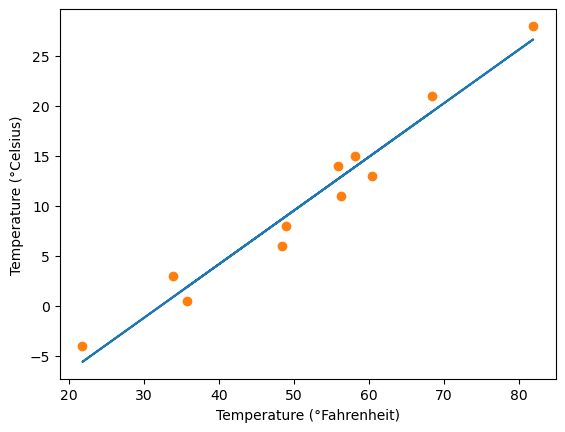

In [41]:
t_p = model(t_un, *params)

plt.figure()
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.scatter(t_u.numpy(), t_c.numpy(), marker="o", color="#ff7f0e")
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.savefig("data/linear.png")
plt.show()

## Autograd

In [42]:
def model(t_u, w, b):
    return w * t_u + b

In [43]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [44]:
params = torch.tensor([1.0, 0.0], requires_grad=True)

In [45]:
params.grad is None

True

In [46]:
loss = loss_fn(model(t_u, *params), t_c)
loss.backward()

In [47]:
params.grad

tensor([4517.2969,   82.6000])

In [48]:
if params.grad is not None:
    params.grad.zero_()

In [49]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:
            params.grad.zero_()

        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        loss.backward()

        with torch.no_grad():
            params -= learning_rate * params.grad

        if epoch % 500 == 0:
            print("Epoch: {0}, Loss: {1}".format(epoch, float(loss)))

    return params

In [50]:
training_loop(
    n_epochs=5000,
    learning_rate=1e-2,
    params=torch.tensor([1.0, 0.0], requires_grad=True),
    t_u=t_un,
    t_c=t_c)

Epoch: 500, Loss: 7.860115051269531
Epoch: 1000, Loss: 3.828537940979004
Epoch: 1500, Loss: 3.092191219329834
Epoch: 2000, Loss: 2.957697868347168
Epoch: 2500, Loss: 2.933133840560913
Epoch: 3000, Loss: 2.9286484718322754
Epoch: 3500, Loss: 2.9278297424316406
Epoch: 4000, Loss: 2.9276793003082275
Epoch: 4500, Loss: 2.927651882171631
Epoch: 5000, Loss: 2.9276468753814697


tensor([  5.3671, -17.3012], requires_grad=True)

## Optimizers

In [51]:
import torch.optim as optim

In [52]:
list(filter(lambda x: x[0].isupper(), dir(optim)))

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'NAdam',
 'Optimizer',
 'RAdam',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam']

In [53]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-5
optimizer = optim.SGD([params], lr=learning_rate)

In [54]:
t_p = model(t_u, *params)
loss = loss_fn(t_p, t_c)
loss.backward()

optimizer.step()

params

tensor([ 9.5483e-01, -8.2600e-04], requires_grad=True)

In [55]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

t_p = model(t_un, *params)
loss = loss_fn(t_p, t_c)

optimizer.zero_grad()
loss.backward()
optimizer.step()

params

tensor([1.7761, 0.1064], requires_grad=True)

In [56]:
def training_loop(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print("Epoch: {0}, Loss: {1}".format(epoch, float(loss)))

    return params

In [57]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs=5000,
    optimizer=optimizer,
    params=params,
    t_u=t_un,
    t_c=t_c)

Epoch: 500, Loss: 7.860115051269531
Epoch: 1000, Loss: 3.828537940979004
Epoch: 1500, Loss: 3.092191219329834
Epoch: 2000, Loss: 2.957697868347168
Epoch: 2500, Loss: 2.933133840560913
Epoch: 3000, Loss: 2.9286484718322754
Epoch: 3500, Loss: 2.9278297424316406
Epoch: 4000, Loss: 2.9276793003082275
Epoch: 4500, Loss: 2.927651882171631
Epoch: 5000, Loss: 2.9276468753814697


tensor([  5.3671, -17.3012], requires_grad=True)

In [58]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-1
optimizer = optim.Adam([params], lr=learning_rate)

training_loop(
    n_epochs=5000,
    optimizer=optimizer,
    params=params,
    t_u=t_u,
    t_c=t_c)

Epoch: 500, Loss: 7.612898349761963
Epoch: 1000, Loss: 3.086700439453125
Epoch: 1500, Loss: 2.928579092025757
Epoch: 2000, Loss: 2.9276442527770996
Epoch: 2500, Loss: 2.927645206451416
Epoch: 3000, Loss: 2.9276459217071533
Epoch: 3500, Loss: 2.927644968032837
Epoch: 4000, Loss: 2.927645683288574
Epoch: 4500, Loss: 2.9276463985443115
Epoch: 5000, Loss: 2.927645206451416


tensor([  0.5368, -17.3048], requires_grad=True)

## Overfitting

In [59]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([ 0,  6, 10,  3,  5,  9,  4,  1,  8]), tensor([7, 2]))

In [60]:
train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

In [61]:
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)

        val_t_p = model(val_t_u, *params)
        val_loss = loss_fn(val_t_p, val_t_c)
        
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        if epoch <=3 or epoch % 500 == 0:
            print(f"Epoch: {epoch}, Training loss: {train_loss.item():.4f}, Validation loss: {val_loss.item():.4f}")

    return params

In [62]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs=5000,
    optimizer=optimizer,
    params=params,
    train_t_u=train_t_un,
    val_t_u=val_t_un,
    train_t_c=train_t_c,
    val_t_c=val_t_c    
)

Epoch: 1, Training loss: 84.6159, Validation loss: 61.2324
Epoch: 2, Training loss: 33.7333, Validation loss: 41.6493
Epoch: 3, Training loss: 27.5114, Validation loss: 41.8520
Epoch: 500, Training loss: 9.7934, Validation loss: 7.6389
Epoch: 1000, Training loss: 4.9039, Validation loss: 1.0555
Epoch: 1500, Training loss: 3.5014, Validation loss: 1.2197
Epoch: 2000, Training loss: 3.0992, Validation loss: 2.3660
Epoch: 2500, Training loss: 2.9838, Validation loss: 3.2835
Epoch: 3000, Training loss: 2.9507, Validation loss: 3.8620
Epoch: 3500, Training loss: 2.9412, Validation loss: 4.1968
Epoch: 4000, Training loss: 2.9385, Validation loss: 4.3833
Epoch: 4500, Training loss: 2.9377, Validation loss: 4.4852
Epoch: 5000, Training loss: 2.9375, Validation loss: 4.5404


tensor([  5.6250, -18.9993], requires_grad=True)

## Enabling/Disabling Autograd

In [63]:
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)

        with torch.no_grad():
            val_t_p = model(val_t_u, *params)
            val_loss = loss_fn(val_t_p, val_t_c)
            assert val_loss.requires_grad == False
        
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        if epoch <=3 or epoch % 500 == 0:
            print(f"Epoch: {epoch}, Training loss: {train_loss.item():.4f}, Validation loss: {val_loss.item():.4f}")

    return params

In [64]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs=5000,
    optimizer=optimizer,
    params=params,
    train_t_u=train_t_un,
    val_t_u=val_t_un,
    train_t_c=train_t_c,
    val_t_c=val_t_c    
)

Epoch: 1, Training loss: 84.6159, Validation loss: 61.2324
Epoch: 2, Training loss: 33.7333, Validation loss: 41.6493
Epoch: 3, Training loss: 27.5114, Validation loss: 41.8520
Epoch: 500, Training loss: 9.7934, Validation loss: 7.6389
Epoch: 1000, Training loss: 4.9039, Validation loss: 1.0555
Epoch: 1500, Training loss: 3.5014, Validation loss: 1.2197
Epoch: 2000, Training loss: 3.0992, Validation loss: 2.3660
Epoch: 2500, Training loss: 2.9838, Validation loss: 3.2835
Epoch: 3000, Training loss: 2.9507, Validation loss: 3.8620
Epoch: 3500, Training loss: 2.9412, Validation loss: 4.1968
Epoch: 4000, Training loss: 2.9385, Validation loss: 4.3833
Epoch: 4500, Training loss: 2.9377, Validation loss: 4.4852
Epoch: 5000, Training loss: 2.9375, Validation loss: 4.5404


tensor([  5.6250, -18.9993], requires_grad=True)

In [65]:
def calc_forward(params, t_u, t_c, is_train):
    with torch.set_grad_enabled(is_train):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
    return loss

## Exercises

In [66]:
import torch
from torch.optim import Adam
import matplotlib.pyplot as plt

In [67]:
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = torch.tensor(t_u)
t_c = torch.tensor(t_c)

$$
y = w_2 x^2 + w_1 x + b
$$

In [68]:
def model(x, w1, w2, b):
    return w2 * x ** 2 + w1 * x + b

In [69]:
def loss_fn(y, y_pred):
    squared_diffs = (y - y_pred) ** 2
    return squared_diffs.mean()

In [70]:
def train(n_epochs, x, y, optimizer, params):
    for epoch in range(1, n_epochs + 1):
        y_pred = model(x, *params)
        loss = loss_fn(y, y_pred)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch in {1, 2, 3, 10, 11, 99, 100, 199, 200, 299, 300, 399, 400}:
            print(f"Epoch: {epoch}, Loss: {loss.item():.4f}")
        if epoch in {4, 12, 101, 201, 301, 401}:
            print("...")
        if epoch % 500 == 0:
            print(f"Epoch: {epoch}, Loss: {loss.item():.4f}")

    return params

In [71]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
optimizer = Adam([params], lr=1e-2)

train(
    n_epochs=5000,
    x=t_u,
    y=t_c,
    optimizer=optimizer,
    params=params
)

Epoch: 1, Loss: 11709471.0000
Epoch: 2, Loss: 11475490.0000
Epoch: 3, Loss: 11243930.0000
...
Epoch: 10, Loss: 9694148.0000
Epoch: 11, Loss: 9483327.0000
...
Epoch: 99, Loss: 627795.1250
Epoch: 100, Loss: 602965.7500
...
Epoch: 199, Loss: 3046.1250
Epoch: 200, Loss: 2846.3159
...
Epoch: 299, Loss: 6.5453
Epoch: 300, Loss: 6.4991
...
Epoch: 399, Loss: 6.1271
Epoch: 400, Loss: 6.1269
...
Epoch: 500, Loss: 6.1087
Epoch: 1000, Loss: 5.9844
Epoch: 1500, Loss: 5.8090
Epoch: 2000, Loss: 5.5863
Epoch: 2500, Loss: 5.3209
Epoch: 3000, Loss: 5.0213
Epoch: 3500, Loss: 4.7013
Epoch: 4000, Loss: 4.3808
Epoch: 4500, Loss: 4.0834
Epoch: 5000, Loss: 3.8327


tensor([-0.0698,  0.0054, -1.2251], requires_grad=True)

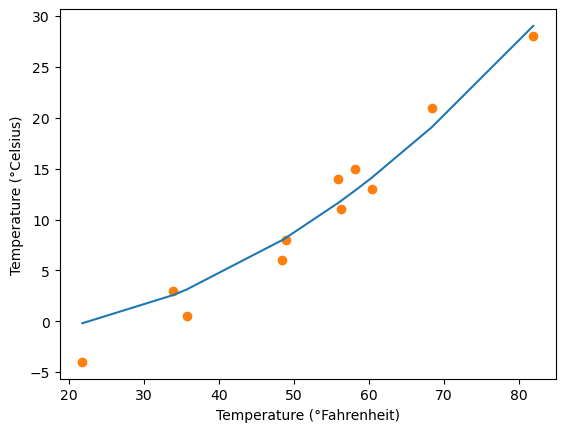

In [72]:
y_pred = model(t_u, *params)

y_pred = y_pred.detach().numpy()
x = t_u.numpy()
y = t_c.numpy()

combined = list(zip(y_pred, x, y))
combined_sorted = sorted(combined, key=lambda x: x[0])
y_pred, x, y = zip(*combined_sorted)

plt.figure()
plt.plot(x, y_pred)
plt.scatter(x, y, marker="o", color="#ff7f0e")
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.savefig("data/quadratic.png")
plt.show()

In [80]:
def train_with_validation(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_u, *params)
        train_loss = loss_fn(train_t_c, train_t_p)

        with torch.no_grad():
            val_t_p = model(val_t_u, *params)
            val_loss = loss_fn(val_t_c, val_t_p)
            assert val_loss.requires_grad == False
        
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        if epoch <=3 or epoch % 500 == 0:
            print(f"Epoch: {epoch}, Training loss: {train_loss.item():.4f}, Validation loss: {val_loss.item():.4f}")

    return params

In [82]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
optimizer = Adam([params], lr=1e-2)

train_with_validation(
    n_epochs=5000,
    optimizer=optimizer,
    params=params,
    train_t_u=train_t_u,
    val_t_u=val_t_u,
    train_t_c=train_t_c,
    val_t_c=val_t_c    
)

Epoch: 1, Training loss: 12976137.0000, Validation loss: 6009479.5000
Epoch: 2, Training loss: 12716850.0000, Validation loss: 5889362.5000
Epoch: 3, Training loss: 12460249.0000, Validation loss: 5770491.0000
Epoch: 500, Training loss: 4.3134, Validation loss: 14.3086
Epoch: 1000, Training loss: 4.2302, Validation loss: 14.1478
Epoch: 1500, Training loss: 4.1125, Validation loss: 13.9166
Epoch: 2000, Training loss: 3.9623, Validation loss: 13.6148
Epoch: 2500, Training loss: 3.7823, Validation loss: 13.2412
Epoch: 3000, Training loss: 3.5775, Validation loss: 12.7972
Epoch: 3500, Training loss: 3.3566, Validation loss: 12.2895
Epoch: 4000, Training loss: 3.1326, Validation loss: 11.7320
Epoch: 4500, Training loss: 2.9216, Validation loss: 11.1473
Epoch: 5000, Training loss: 2.7402, Validation loss: 10.5663


tensor([-0.0565,  0.0051, -1.1444], requires_grad=True)